# Problem 4

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [71]:
def get_columns(A,col):
    return [x[col] for x in A]
def multiply(A,B):
    k = [[[A[x][a] * get_columns(B,y)[a] for a in range(len(B))] for y in range(len(B[0]))] for x in range(len(A))]
    k = [[sum(y) for y in x] for x in k]
    return k
def calc(X,w):
    return [np.sum(np.dot(x,w)) for x in X]   

class linreg():     
    def linreg(self,X,y):
        self.X = X
        self.y = y
        self.XT = np.transpose(self.X)
        self.XXT = multiply(self.XT,self.X)
        
        self.iX = np.linalg.pinv(self.XXT)
        self.w = multiply(multiply(self.iX,self.XT),self.y)
        
        return self.w
    
    def linreg_wb(self,X,y):
        self.Xorig = X
        print(X)
        self.X = np.concatenate([[[1]for x in range(len(X))],X],axis=1)
        self.y = y
        self.XT = np.transpose(self.X)
        self.XXT = multiply(self.XT,self.X)
        
        self.iX = np.linalg.pinv(self.XXT)
        self.w = multiply(multiply(self.iX,self.XT),self.y)
        
        self.preds = calc(self.X,self.w)
        
        self.ploty()
        
        return self.w
    
    def ploty(self):
        plt.plot(self.Xorig,self.preds)
        plt.plot(self.Xorig,self.y,"o")
        plt.vlines(self.Xorig, self.y, self.preds, colors='k', linestyles='solid', label='')
        plt.show()
    
    def b(self,xs,ys):
        b = (ys[0]+ys[1])/2
        return b
    
    def ax_b(self,xs,ys):
        m = (ys[0]-ys[1])/(xs[0]-xs[1])
        b = ys[0]-m*xs[0]
        return [m,b]

class Plot():
    def plot(self):
        plt.plot([-1,1],[self.ax_bV[0]+self.ax_bV[1]*x for x in [-1,1]],label='linreg')
        plt.plot([-1,1],[self.m[0]*x+self.m[1] for x in [-1,1]],label='linreg')
        xvals = np.arange(-1,1,.1);
        amplitude = np.sin(xvals*math.pi)
        plt.plot(xvals, amplitude)
        plt.plot(self.x,self.y,"o")
        plt.xlim([-1, 1])
        plt.ylim([-1, 1])
        plt.show()
    
        
    
        
class bandv(linreg, Plot):
    def __init__(self,N):
        self.N = N
        self.runEx()
        
    def runEx(self):
        avgs = []
        for x in range(1):
            X = np.random.uniform(1,-1,2)
            self.x = X
            y = np.sin(X*math.pi)
            i = X.reshape(-1,1)
            k = y.reshape(-1,1)
            self.ax_bV = np.array(self.linreg_wb(i,k)).reshape(1,-1)[0]
            self.m = self.ax_b(X,y)
            self.plot()
           
            print(self.m)
        
    def Eout_ax(self):
        g = self.xvals * self.axV
        return np.mean(np.power((g-self.f),2))
    
    def Eout_ax_sqr(self):
        g = self.xvals**2 * self.ax_sqrV
        return np.mean(np.power((g-self.f),2))
    
    def Eout_ax_sqr_b(self):
        g = self.xvals**2 * self.ax_sqr_bV[0] + self.ax_sqr_bV[1]
        return np.mean(np.power((g-self.f),2))
  
    def Eout_b(self):
        g = self.bV
        return np.mean(np.power((g-self.f),2))
    
    def Eout_ax_b(self):
        g = self.xvals * self.ax_bV[0] + self.ax_bV[1]
        return np.mean(np.power((g-self.f),2))
            
        

[[0.87551767]
 [0.38301997]]


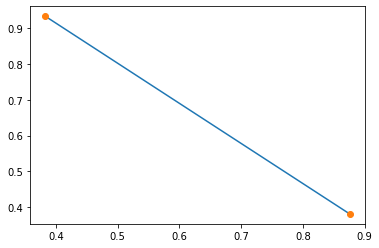

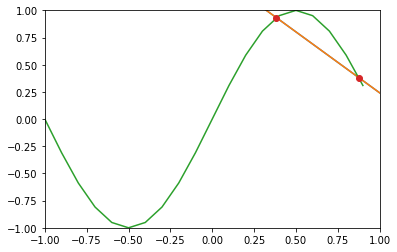

[-1.1209123506716554, 1.3625589853682096]


In [72]:
bandv(2)